# Análise dos motores a 150 metros por minuto

In [29]:
#Importando as bibliotecas necessárias
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from SEC_ANALYSIS import *

In [30]:
#Carregando dataset
data150 = pd.read_excel('Data_Set_Regressao_6.xlsx')

In [31]:
#Exibindo alguns dados do dataset
data150.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2021-03-01 00:00:00.112,145.988844,150.112594,149.588070,151.333223,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-01 00:00:01.348,145.333596,149.602304,150.737152,151.297747,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-01 00:00:02.049,145.241375,149.558651,150.464358,150.783715,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-03-01 00:00:03.349,145.937183,150.032650,149.646428,152.027451,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-03-01 00:00:04.029,145.900268,149.697587,150.371697,151.034176,1,0,150,D,0,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data150.drop(['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15'], axis=1, inplace=True) 

In [33]:
data150.drop(data150.loc[data150['Set_Point']==190].index, inplace=True)

In [34]:
data150.shape[0]

1348

In [35]:
#Estatística descritiva do conjunto
data150.describe()

,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Soma
count,1348.000000,1348.000000,1348.000000,1348.000000,1348.000000,1348.0,1348.0,1348.0
mean,145.529169,149.774122,150.207348,151.379474,2.000742,0.0,150.0,0.0
std,0.534224,0.481537,0.499388,0.332541,0.816951,0.0,0.0,0.0
min,143.850691,148.326799,149.028516,150.468465,1.000000,0.0,150.0,0.0
25%,145.155448,149.448481,149.771149,151.132594,1.000000,0.0,150.0,0.0
50%,145.530061,149.795267,150.283653,151.367642,2.000000,0.0,150.0,0.0
75%,145.898281,150.105900,150.547533,151.603234,3.000000,0.0,150.0,0.0
max,147.233065,151.514747,151.467796,152.440080,3.000000,0.0,150.0,0.0


In [36]:
'''#Localizando e substituindo dados nulos da coluna 'FALHAS' por 0s.
data150.update(data150['FALHAS'].fillna(0))
'''


"#Localizando e substituindo dados nulos da coluna 'FALHAS' por 0s.\ndata150.update(data150['FALHAS'].fillna(0))\n"

In [37]:
data150.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
0,2021-03-01 00:00:00.112,145.988844,150.112594,149.588070,151.333223,1,0,150,D,0
1,2021-03-01 00:00:01.348,145.333596,149.602304,150.737152,151.297747,1,0,150,D,0
2,2021-03-01 00:00:02.049,145.241375,149.558651,150.464358,150.783715,1,0,150,D,0
3,2021-03-01 00:00:03.349,145.937183,150.032650,149.646428,152.027451,1,0,150,D,0
4,2021-03-01 00:00:04.029,145.900268,149.697587,150.371697,151.034176,1,0,150,D,0


In [38]:
#Conferindo quantidade de dados nulos no dataset
data150.isnull().sum()

BasicVariables/SEC_Velocidade_P2_PV_Timestamp    0
BasicVariables/SEC_Velocidade_P2_PV              0
BasicVariables/SEC_Velocidade_P3_PV              0
BasicVariables/SEC_Velocidade_P4_PV              0
BasicVariables/SEC_Velocidade_P5_PV              0
Set                                              0
Falha                                            0
Set_Point                                        0
Cor                                              0
Soma                                             0
dtype: int64

In [39]:
#Criando cópia do dataframe principal
data2 = data150.copy()

In [40]:
data2.shape[0]

1348

In [41]:
#Deletando linhas com falhas
#data2.drop(data2.loc[data2['FALHAS']== 1].index, inplace=True)

In [42]:
'''
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P2_PV'] - 183.10) > 25].index, inplace=True)
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P3_PV'] - 188.7) > 25].index, inplace=True)
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P4_PV'] - 193.46) > 25].index, inplace=True)
data2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P5_PV'] - 188.9) > 25].index, inplace=True)
'''

"\ndata2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P2_PV'] - 183.10) > 25].index, inplace=True)\ndata2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P3_PV'] - 188.7) > 25].index, inplace=True)\ndata2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P4_PV'] - 193.46) > 25].index, inplace=True)\ndata2.drop(data2.loc[abs(data2['BasicVariables/SEC_Velocidade_P5_PV'] - 188.9) > 25].index, inplace=True)\n"

In [82]:
#Verificando a quantidade de linhas após remoção de outliers
#data2.shape[0]

1348

In [44]:
data2.dtypes

BasicVariables/SEC_Velocidade_P2_PV_Timestamp    datetime64[ns]
BasicVariables/SEC_Velocidade_P2_PV                     float64
BasicVariables/SEC_Velocidade_P3_PV                     float64
BasicVariables/SEC_Velocidade_P4_PV                     float64
BasicVariables/SEC_Velocidade_P5_PV                     float64
Set                                                       int64
Falha                                                     int64
Set_Point                                                 int64
Cor                                                      object
Soma                                                      int64
dtype: object

In [45]:
df_s1 = data2[data2['Set']==1]
df_s1.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
0,2021-03-01 00:00:00.112,145.988844,150.112594,149.588070,151.333223,1,0,150,D,0
1,2021-03-01 00:00:01.348,145.333596,149.602304,150.737152,151.297747,1,0,150,D,0
2,2021-03-01 00:00:02.049,145.241375,149.558651,150.464358,150.783715,1,0,150,D,0
3,2021-03-01 00:00:03.349,145.937183,150.032650,149.646428,152.027451,1,0,150,D,0
4,2021-03-01 00:00:04.029,145.900268,149.697587,150.371697,151.034176,1,0,150,D,0


In [46]:
df_s1.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
444,2021-03-01 00:08:42.490,146.349814,149.963428,151.073956,151.853828,1,0,150,D,0
445,2021-03-01 00:08:45.891,146.349814,149.963428,151.073956,151.853828,1,0,150,D,0
446,2021-03-01 00:08:46.408,144.814080,149.189663,150.488556,151.335144,1,0,150,D,0
447,2021-03-01 00:08:46.601,145.629880,148.741018,150.649487,150.877711,1,0,150,D,0
448,2021-03-01 00:08:48.580,145.846620,149.242102,150.482227,151.437513,1,0,150,D,0


In [47]:
df_s2 = data2[data2['Set']==2]
df_s2.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
449,2021-03-02 00:01:59.014,146.537882,149.578660,149.572782,151.844330,2,0,150,D,0
450,2021-03-02 00:02:00.668,145.519247,149.543444,149.739817,151.529805,2,0,150,D,0
451,2021-03-02 00:02:04.235,144.491971,149.491077,150.699817,151.303257,2,0,150,D,0
452,2021-03-02 00:02:04.364,144.956078,150.474680,149.324585,151.981583,2,0,150,D,0
453,2021-03-02 00:02:05.254,144.881111,148.727398,150.791055,150.977651,2,0,150,D,0


In [48]:
df_s2.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
893,2021-03-02 00:09:33.608,145.351322,149.313167,150.717174,151.522168,2,0,150,D,0
894,2021-03-02 00:09:34.906,145.046190,149.410591,150.374267,151.390509,2,0,150,D,0
895,2021-03-02 00:09:35.600,146.086185,150.867384,150.411121,151.040326,2,0,150,D,0
896,2021-03-02 00:09:36.917,146.143222,150.147686,150.909942,151.398400,2,0,150,D,0
897,2021-03-02 00:09:37.994,145.547284,150.754529,150.791700,150.540384,2,0,150,D,0


In [49]:
df_s3 = data2[data2['Set']==3]
df_s3.head()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
898,2021-02-28 14:56:31.322,146.198467,149.429965,150.518989,151.690982,3,0,150,D,0
899,2021-02-28 14:56:32.320,145.348045,149.965189,150.656707,151.963845,3,0,150,D,0
900,2021-02-28 14:56:33.327,145.854648,149.565399,150.695823,151.353970,3,0,150,D,0
901,2021-02-28 14:56:34.322,145.758331,150.730619,150.695823,151.603488,3,0,150,D,0
902,2021-02-28 14:56:35.330,144.602030,149.948703,150.634701,150.960118,3,0,150,D,0


In [50]:
df_s3.tail()

,BasicVariables/SEC_Velocidade_P2_PV_Timestamp,BasicVariables/SEC_Velocidade_P2_PV,BasicVariables/SEC_Velocidade_P3_PV,BasicVariables/SEC_Velocidade_P4_PV,BasicVariables/SEC_Velocidade_P5_PV,Set,Falha,Set_Point,Cor,Soma
1343,2021-02-28 15:04:58.731,146.325463,149.444291,150.525942,151.691973,3,0,150,D,0
1344,2021-02-28 15:04:59.716,146.675651,149.408266,151.222538,151.222348,3,0,150,D,0
1345,2021-02-28 15:05:00.419,145.895352,150.438646,149.915484,151.513057,3,0,150,D,0
1346,2021-02-28 15:05:01.422,145.681326,150.040504,150.317691,151.027881,3,0,150,D,0
1347,2021-02-28 15:05:03.062,144.842312,149.822781,151.167191,151.854359,3,0,150,D,0


In [51]:
#Selecionando dados para gráficos, talvez seja melhor eu usar uma função para isto
p2_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV'].tolist()
p2_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV'].tolist()
p2_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV'].tolist()

t2_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t2_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t2_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()


In [52]:
p3_1 = df_s1['BasicVariables/SEC_Velocidade_P3_PV'].tolist()
p3_2 = df_s2['BasicVariables/SEC_Velocidade_P3_PV'].tolist()
p3_3 = df_s3['BasicVariables/SEC_Velocidade_P3_PV'].tolist()


t3_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t3_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t3_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()



In [53]:
p4_1 = df_s1['BasicVariables/SEC_Velocidade_P4_PV'].tolist()
p4_2 = df_s2['BasicVariables/SEC_Velocidade_P4_PV'].tolist()
p4_3 = df_s3['BasicVariables/SEC_Velocidade_P4_PV'].tolist()


t4_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t4_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t4_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()


In [54]:
p5_1 = df_s1['BasicVariables/SEC_Velocidade_P5_PV'].tolist()
p5_2 = df_s2['BasicVariables/SEC_Velocidade_P5_PV'].tolist()
p5_3 = df_s3['BasicVariables/SEC_Velocidade_P5_PV'].tolist()


t5_1 = df_s1['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t5_2 = df_s2['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()
t5_3 = df_s3['BasicVariables/SEC_Velocidade_P2_PV_Timestamp'].tolist()


In [55]:
print(len(p2_1))

449


P2 28/01/2021 02:09:39

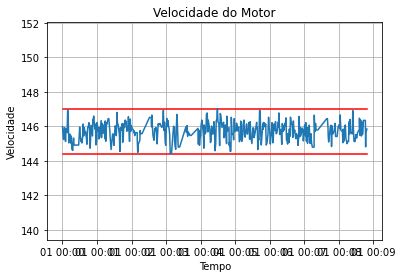

In [56]:
grafico_p2_1 = gera_grafico(t2_1, p2_1)
grafico_p2_1.show()

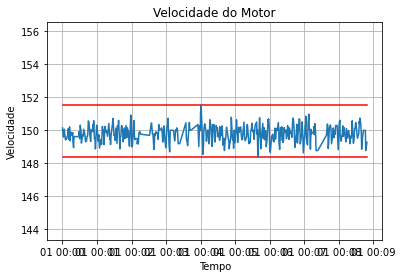

In [57]:
grafico_p3_1 = gera_grafico(t3_1, p3_1)
grafico_p3_1.show()

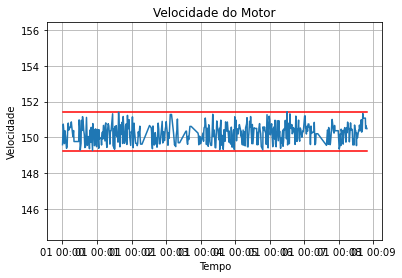

In [58]:
grafico_p4_1 = gera_grafico(t4_1, p4_1)
grafico_p4_1.show()

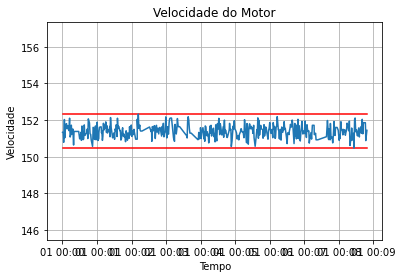

In [59]:
grafico_p5_1 = gera_grafico(t5_1, p5_1)
grafico_p5_1.show()

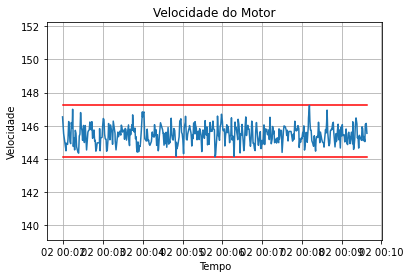

In [60]:
grafico_p2_2 = gera_grafico(t2_2, p2_2)
grafico_p2_2.show()

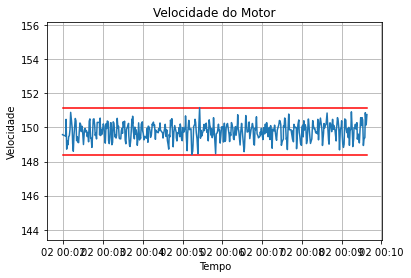

In [61]:
grafico_p3_2 = gera_grafico(t3_2, p3_2)
grafico_p3_2.show()

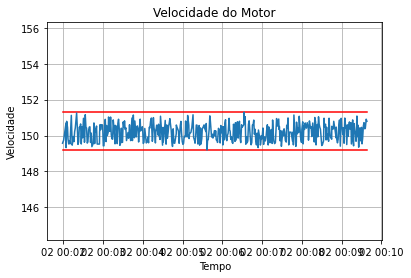

In [62]:
grafico_p4_2 = gera_grafico(t4_2, p4_2)
grafico_p4_2.show()

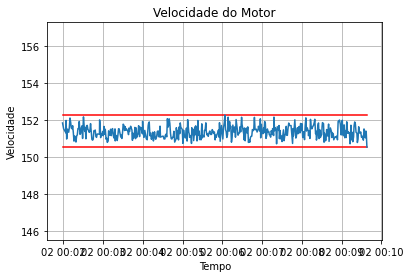

In [63]:
grafico_p5_2 = gera_grafico(t5_2, p5_2)
grafico_p5_2.show()

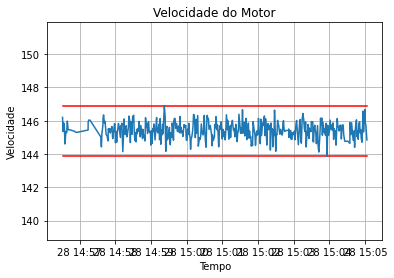

In [64]:
grafico_p2_3 = gera_grafico(t2_3, p2_3)
grafico_p2_3.show()

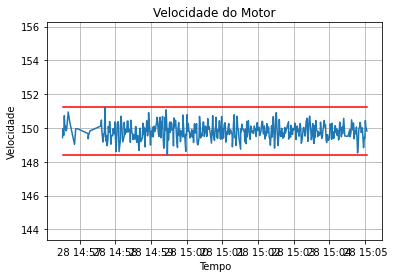

In [65]:
grafico_p3_3 = gera_grafico(t3_3, p3_3)
grafico_p3_3.show()

In [66]:
print(len(p4_3))

450


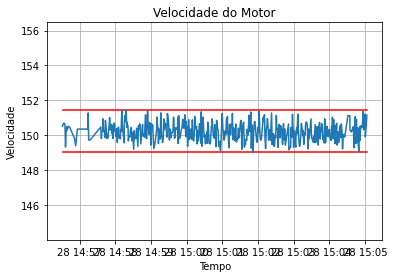

In [67]:
grafico_p4_3 = gera_grafico(t4_3, p4_3)
grafico_p4_3.show()

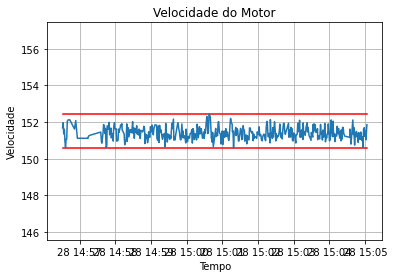

In [68]:
grafico_p5_3 = gera_grafico(t5_3, p5_3)
grafico_p5_3.show()

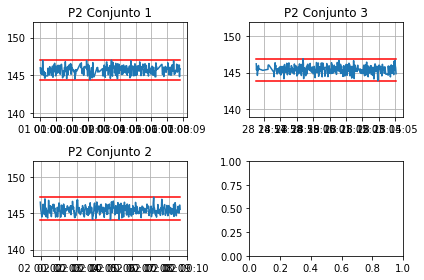

In [69]:
grafico_multiplo_p2 = gera_grafico_multiplo_2(t2_1, p2_1,t2_2, p2_2,t2_3, p2_3)
grafico_multiplo_p2.show()

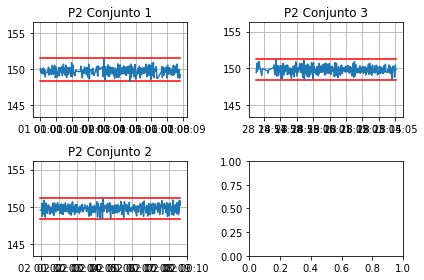

In [70]:
grafico_multiplo_p3 = gera_grafico_multiplo_2(t3_1, p3_1,t3_2, p3_2,t3_3, p3_3)
grafico_multiplo_p3.show()

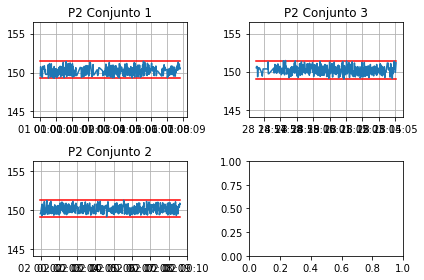

In [71]:
grafico_multiplo_p4 = gera_grafico_multiplo_2(t4_1, p4_1,t4_2, p4_2,t4_3, p4_3)
grafico_multiplo_p4.show()

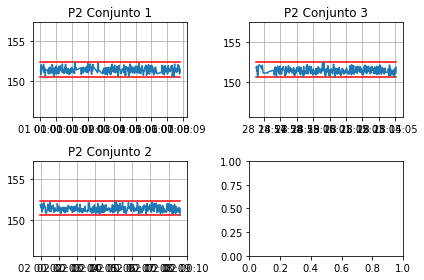

In [72]:
grafico_multiplo_p5 = gera_grafico_multiplo_2(t5_1, p5_1,t5_2, p5_2,t5_3, p5_3)
grafico_multiplo_p5.show()

In [73]:
    freq_min_p2_1,freq_max_p2_1 = calcula_frequencia_round(p2_1)
    print("O valor de Frequencia para P2 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p2_1,freq_max_p2_1))
 
    freq_min_p2_2,freq_max_p2_2 = calcula_frequencia_round(p2_2)
    print("O valor de Frequencia para P2 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p2_2,freq_max_p2_2))   
 
    freq_min_p2_3,freq_max_p2_3 = calcula_frequencia_round(p2_3)
    print("O valor de Frequencia para P2 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p2_3,freq_max_p2_3))    
 

O valor de Frequencia para P2 Conjunto 1: Min: 3 e Máx: 24
O valor de Frequencia para P2 Conjunto 2: Min: 18 e Máx: 15
O valor de Frequencia para P2 Conjunto 3: Min: 17 e Máx: 5


In [74]:
    freq_min_p3_1,freq_max_p3_1 = calcula_frequencia_round(p3_1)
    print("O valor de Frequencia para P3 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p3_1,freq_max_p3_1)) 
    
    freq_min_p3_2,freq_max_p3_2 = calcula_frequencia_round(p3_2)
    print("O valor de Frequencia para P3 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p3_2,freq_max_p3_2)) 
    
    freq_min_p3_3,freq_max_p3_3 = calcula_frequencia_round(p3_3)
    print("O valor de Frequencia para P3 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p3_3,freq_max_p3_3))  
     

O valor de Frequencia para P3 Conjunto 1: Min: 1 e Máx: 1
O valor de Frequencia para P3 Conjunto 2: Min: 3 e Máx: 28
O valor de Frequencia para P3 Conjunto 3: Min: 1 e Máx: 28


In [75]:
    freq_min_p4_1,freq_max_p4_1 = calcula_frequencia_round(p4_1)
    print("O valor de Frequencia para P4 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p4_1,freq_max_p4_1)) 
    
    freq_min_p4_2,freq_max_p4_2 = calcula_frequencia_round(p4_2)
    print("O valor de Frequencia para P4 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p4_2,freq_max_p4_2)) 
    
    freq_min_p4_3,freq_max_p4_3 = calcula_frequencia_round(p4_3)
    print("O valor de Frequencia para P4 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p4_3,freq_max_p4_3))  
      

O valor de Frequencia para P4 Conjunto 1: Min: 35 e Máx: 130
O valor de Frequencia para P4 Conjunto 2: Min: 28 e Máx: 126
O valor de Frequencia para P4 Conjunto 3: Min: 39 e Máx: 129


In [76]:
    freq_min_p5_1,freq_max_p5_1 = calcula_frequencia_round(p5_1)
    print("O valor de Frequencia para P5 Conjunto 1: Min: {0} e Máx: {1}".format(freq_min_p5_1,freq_max_p5_1)) 
    
    freq_min_p5_2,freq_max_p5_2 = calcula_frequencia_round(p5_2)
    print("O valor de Frequencia para P5 Conjunto 2: Min: {0} e Máx: {1}".format(freq_min_p5_2,freq_max_p5_2)) 
    
    freq_min_p5_3,freq_max_p5_3 = calcula_frequencia_round(p5_3)
    print("O valor de Frequencia para P5 Conjunto 3: Min: {0} e Máx: {1}".format(freq_min_p5_3,freq_max_p5_3))  
    


O valor de Frequencia para P5 Conjunto 1: Min: 1 e Máx: 158
O valor de Frequencia para P5 Conjunto 2: Min: 306 e Máx: 143
O valor de Frequencia para P5 Conjunto 3: Min: 292 e Máx: 158


In [77]:
'''
result = [((y-190)/190)*100 for y in p2_1]
#print(result)
print(min(result))
print(max(result))
'''

'\nresult = [((y-190)/190)*100 for y in p2_1]\n#print(result)\nprint(min(result))\nprint(max(result))\n'

In [78]:
min_var_2_1,max_var_2_1,p2_1_var = calcula_variacao_set_point(p2_1,150)
print(min_var_2_1)
print(max_var_2_1)
print(max_var_2_1-min_var_2_1)
print("---")
min_var_2_2,max_var_2_2,p2_2_var = calcula_variacao_set_point(p2_2,150)
print(min_var_2_2)
print(max_var_2_2)
print(max_var_2_2-min_var_2_2)
print("---")
min_var_2_3,max_var_2_3,p2_3_var = calcula_variacao_set_point(p2_3,150)
print(min_var_2_3)
print(max_var_2_3)
print(max_var_2_3-min_var_2_3)
print("---")


-3.7148979199999985
-1.9788287999999927
1.7360691200000058
---
-3.9130555733333376
-1.8446233599999953
2.0684322133333426
---
-4.099539626666664
-2.0667699199999943
2.03276970666667
---


In [79]:
min_var_3_1,max_var_3_1,p3_1_var = calcula_variacao_set_point(p3_1,150)
print(min_var_3_1)
print(max_var_3_1)
print(max_var_3_1-min_var_3_1)
print("---")
min_var_3_2,max_var_3_2,p3_2_var = calcula_variacao_set_point(p3_2,150)
print(min_var_3_2)
print(max_var_3_2)
print(max_var_3_2-min_var_3_2)
print("---")
min_var_3_3,max_var_3_3,p3_3_var = calcula_variacao_set_point(p3_3,150)
print(min_var_3_3)
print(max_var_3_3)
print(max_var_3_3-min_var_3_3)
print("---")


-1.1154670933333364
1.0098312533333267
2.1252983466666633
---
-1.0601028266666692
0.7769941333333275
1.8370969599999967
---
-1.0789034666666641
0.8328977066666614
1.9118011733333256
---


In [80]:
min_var_4_1,max_var_4_1,p4_1_var = calcula_variacao_set_point(p4_1,150)
print(min_var_4_1)
print(max_var_4_1)
print(max_var_4_1-min_var_4_1)
print("---")
min_var_4_2,max_var_4_2,p4_2_var = calcula_variacao_set_point(p4_2,150)
print(min_var_4_2)
print(max_var_4_2)
print(max_var_4_2-min_var_4_2)
print("---")
min_var_4_3,max_var_4_3,p4_3_var = calcula_variacao_set_point(p4_3,150)
print(min_var_4_3)
print(max_var_4_3)
print(max_var_4_3-min_var_4_3)
print("---")


-0.49312085333334227
0.9575389866666721
1.4506598400000144
---
-0.537678506666661
0.8677683200000008
1.4054468266666618
---
-0.6476561066666591
0.9785309866666694
1.6261870933333284
---


In [81]:
min_var_5_1,max_var_5_1,p5_1_var = calcula_variacao_set_point(p5_1,150)
print(min_var_5_1)
print(max_var_5_1)
print(max_var_5_1-min_var_5_1)
print("---")
min_var_5_2,max_var_5_2,p5_2_var = calcula_variacao_set_point(p5_2,150)
print(min_var_5_2)
print(max_var_5_2)
print(max_var_5_2-min_var_5_2)
print("---")
min_var_5_3,max_var_5_3,p5_3_var = calcula_variacao_set_point(p5_3,150)
print(min_var_5_3)
print(max_var_5_3)
print(max_var_5_3-min_var_5_3)
print("---")


0.3123097600000051
1.5510310912000023
1.2387213311999972
---
0.36025589760000304
1.5155387050666604
1.1552828074666575
---
0.38217482239999373
1.6267202559999985
1.2445454336000048
---
